In [ ]:
from pandas import *
from ggplot import *
%matplotlib inline

ny_subway_data = \
    "./data/data/turnstile_data_master_with_weather.csv"


df = read_csv(ny_subway_data)
#df = df.sample(frac = 0.1)

hour_ens = df[df['ENTRIESn_hourly'] < 7000]
hour_ens_rain = df[ ( df['ENTRIESn_hourly'] < 7000 ) & ( df['rain'] == 1)]
hour_ens_norain = df[ ( df['ENTRIESn_hourly'] < 7000 ) & ( df['rain'] == 0)]

mean_col_name = 'Average Entries hourly'
median_col_name = 'Median Entries hourly'
hour_mean = hour_ens.groupby('Hour', as_index=False).mean();
hour_median = hour_ens.groupby('Hour', as_index=False).median();
#hour_ens.rename(columns = {'Hour' : 'Data' }, inplace = True)
#hour_mean.rename(columns = {'Hour' : 'Mean' }, inplace = True)
#hour_median.rename(columns = {'Hour' : 'Median' }, inplace = True)
hour_mean.rename(columns = {'ENTRIESn_hourly' : mean_col_name }, inplace = True)
hour_median.rename(columns = {'ENTRIESn_hourly' : median_col_name }, inplace = True)


hour_mean_rain = hour_ens_rain.groupby('Hour', as_index=False).mean();
hour_mean_rain.rename(columns = {'ENTRIESn_hourly' : mean_col_name }, inplace = True)

hour_mean_norain = hour_ens_rain.groupby('Hour', as_index=False).mean();
hour_mean_norain.rename(columns = {'ENTRIESn_hourly' : mean_col_name }, inplace = True)

title = "Entries per hour from the 1st to the 30th of May 2011 "
xlable = "Hour"
ylable = "Entries per hour"

gg = ggplot(aes(x='Hour', y='ENTRIESn_hourly'), data=hour_mean) + \
    geom_point(aes(x='Hour', y= mean_col_name), color='orange') + \
    geom_line(aes(x='Hour', y= mean_col_name), color='orange', data=hour_mean) + \
    xlab(xlable) + ylab(ylable) + ggtitle(title)
gg


In [ ]:
hour_ens

<class 'pandas.core.frame.DataFrame'>
    Hour   Total_mean  No_Rain_mean    Rain_mean
0      0  1167.690147   1174.018303  1155.013303
1      1   605.048709    612.011651   590.981979
2      2   181.874257    180.225271   185.157560
3      3    38.810592     39.552574    37.383543
4      4   262.313576    270.396831   246.250964
5      5   142.587866    144.625113   138.470975
6      6    77.356750     77.692404    76.662338
7      7   146.389928    145.728854   147.545073
8      8   683.933781    670.671712   709.430338
9      9  1315.495175   1286.782462  1373.749549
10    10   545.392620    524.110138   587.173219
11    11   292.568130    287.810924   301.266325
12    12  2453.842100   2428.303491  2504.672885
13    13  1136.670129   1134.987500  1140.036607
14    14   411.996463    408.781991   418.574353
15    15   202.954628    200.961512   207.037344
16    16  1867.198923   1877.928132  1845.864821
17    17  1552.469912   1547.053509  1563.340566
18    18   729.480346    715.90

Saving 11.0 x 8.0 in image.


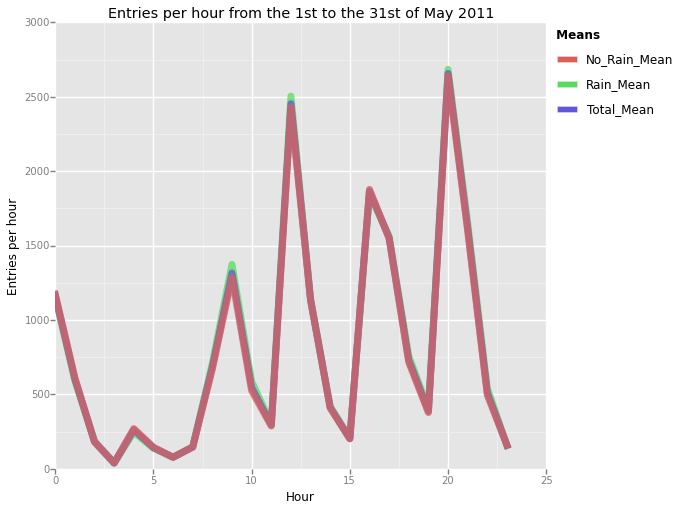

<ggplot: (8793463563135)>

In [23]:
from pandas import *
from ggplot import *
%matplotlib inline
import pandas as pd

ny_subway_data = \
    "./data/data/turnstile_data_master_with_weather.csv"
df = read_csv(ny_subway_data)
hour_ens = df[['Hour','ENTRIESn_hourly']]

hour_rain = df[ df['rain'] == 1 ]
hour_rain_mean = hour_rain[['Hour','ENTRIESn_hourly']]
hour_rain_mean = hour_rain_mean.groupby('Hour', as_index=False).mean()
hour_rain_mean.rename(
    columns = {'ENTRIESn_hourly' : 'Rain_mean' }, 
    inplace = True
)

hour_norain = df[df['rain'] == 0 ]
hour_norain_mean = hour_norain[['Hour','ENTRIESn_hourly']]
hour_norain_mean = hour_norain_mean.groupby('Hour', as_index=False).mean()
hour_norain_mean.rename(
    columns = {'ENTRIESn_hourly' : 'No_Rain_mean' }, 
    inplace = True
)

hour_mean = hour_ens.groupby('Hour', as_index=False).mean();
hour_mean.rename(
    columns = {'ENTRIESn_hourly' : 'Total_mean' },
    inplace = True
)

title = "Entries per hour from the 1st to the 31st of May 2011 "
xlable = "Hour"
ylable = "Entries per hour"

means = pd.merge(hour_mean, hour_norain_mean, on='Hour')
means = pd.merge(means, hour_rain_mean, on='Hour')
print(type(means))
means_mlt = pd.melt(means,id_vars=['Hour'])
means_mlt = means_mlt.rename(
    columns = {'variable': 'Means', 'value' : 'ENTRIES_hourly'}
)

gg = ggplot(aes(x='Hour', y='ENTRIES_hourly',color='Means'), data=means_mlt) + \
    geom_line(
        size= 7.0,
        alpha=0.75
    ) + \
    xlab(xlable) + ylab(ylable) + ggtitle(title)

ggsave(gg,'entries_per_hour.png')

print(means)
gg

In [ ]:
#gg = ggplot(aes(x='Hour', y='Total_mean'), data=hour_mean) + \
#    geom_point(aes(x='Hour', y='Total_mean'), color='orange') + \
#    geom_line(aes(x='Hour', y='Total_mean'), color='orange') + \
#    xlab(xlable) + ylab(ylable) + ggtitle(title) + \
#    ylim(0,4000) + xlim(-.3,24)

#gg

In [ ]:
hour_mean

In [ ]:
from pandas import *
from ggplot import *
%matplotlib inline

ny_subway_data = \
    "./data/data/turnstile_data_master_with_weather.csv"


df = read_csv(ny_subway_data)
#df = df.sample(frac = 0.1)

hour_ens = df[df['ENTRIESn_hourly'] < 7000]
hour_ens_rain = df[ ( df['ENTRIESn_hourly'] < 7000 ) & ( df['rain'] == 1)]
hour_ens_norain = df[ ( df['ENTRIESn_hourly'] < 7000 ) & ( df['rain'] == 0)]

mean_col_name = 'Average Entries hourly'
median_col_name = 'Median Entries hourly'
hour_mean = hour_ens.groupby('Hour', as_index=False).mean();
hour_median = hour_ens.groupby('Hour', as_index=False).median();
#hour_ens.rename(columns = {'Hour' : 'Data' }, inplace = True)
#hour_mean.rename(columns = {'Hour' : 'Mean' }, inplace = True)
#hour_median.rename(columns = {'Hour' : 'Median' }, inplace = True)
hour_mean.rename(columns = {'ENTRIESn_hourly' : mean_col_name }, inplace = True)
hour_median.rename(columns = {'ENTRIESn_hourly' : median_col_name }, inplace = True)

title = "Entries per hour from the 1st to the 30th of May 2011 "
xlable = "Hour"
ylable = "Entries per hour"

gg = ggplot(aes(x='Hour', y='ENTRIESn_hourly'), data=hour_ens) + \
    geom_point(aes(x='Hour', y= 'ENTRIESn_hourly', size=100, alpha=0.1), color='steelblue') + \
    geom_point(aes(x='Hour', y= mean_col_name), color='yellow', data=hour_mean) + \
    geom_point(aes(x='Hour', y= median_col_name), color='black', data=hour_median) + \
    geom_line(aes(x='Hour', y= mean_col_name), color='yellow', data=hour_mean) + \
    xlab(xlable) + ylab(ylable) + ggtitle(title) + \
    ylim(0,4000) + xlim(-.3,24)
gg


In [ ]:
ggsave(gg,'entries_per_hour.png')

In [ ]:
df.head()

In [ ]:
gg

In [ ]:
by_unit = df.loc[:,['Hour', 'ENTRIESn_hourly' , 'UNIT']]
#by_unit = hour_ens[['ENTRIESn_hourly','UNIT', 'Hour']]
#by_unit = by_unit.groupby('UNIT',as_index=False,sort=False).sum()
#by_unit
#by_unit.sort_values('ENTRIESn_hourly',ascending = False).head(n=200)

In [ ]:
by_unit = df.loc[:,['Hour', 'ENTRIESn_hourly' , 'UNIT']]
by_unit_sort = by_unit.sort_values('ENTRIESn_hourly',ascending = False)

#by_unit_sort = by_unit_sort.head(n = 1000)
by_unit_sort = by_unit_sort.reset_index()
unit_count = by_unit_sort.groupby('UNIT').size().sort_values(ascending = False)
unit_count[unit_count >= unit_count[0]/12]
if unit_count.count() > 12:
    unit_count = unit_count[0:12]
unit_list = unit_count.index.tolist()
df.loc[df['UNIT'].isin(unit_list)].count().head(n=1)
df.head()

In [ ]:
from pandas import *
from ggplot import *
%matplotlib inline
import matplotlib as mpl
mpl.style.use('ggplot')

ny_subway_data = \
    "./data/data/turnstile_data_master_with_weather.csv"


df = read_csv(ny_subway_data)
df = df.sample(frac=0.33)

# Get sorted list of stations by the sum of ENTRIESn: 
by_unit = df.loc[:,['ENTRIESn_hourly' , 'UNIT']]
by_unit = by_unit.groupby('UNIT').sum()
by_unit = by_unit.sort_values('ENTRIESn_hourly',ascending = False)

# Filter stations with at least 1/3 of the largest data point:
by_unit_cut = by_unit[by_unit > by_unit.iloc[0]/3]
# PANDAS is nice enough to keep the original df structure so drop NaN values:
by_unit_cut = by_unit_cut.dropna()

# reduce total number of stations to 6, 
# too messy to see much of anything without minimizing this number
if by_unit_cut.count()[0] > 6: 
    by_unit_cut = by_unit_cut[0:6]
    
# Use the generated list to filter out all of the data from the original data 
# frame:    
by_unit_data = df.loc[df['UNIT'].isin(by_unit_cut.index.tolist())]

# Now generate a similar plot as above using a different colors for the 11 
# stations considered:

by_unit_data = by_unit_data[['UNIT','ENTRIESn_hourly','Hour']]
by_unit_data = by_unit_data.sort_values('Hour')
by_unit_data = by_unit_data.groupby(['UNIT','Hour'], \
    as_index=False).sum()
by_unit_data = by_unit_data.sort_values('Hour')
by_unit_data
print(by_unit_cut.head(n=6))

In [ ]:
mpl.rcParams['figure.figsize'] = "6.0, 6.0"
gsize = theme_matplotlib(rc={"figure.figsize": "15, 10"}, matplotlib_defaults=False)

title = "Entries per hour from the top 6 Stations during May 2011 1st through 30th"
xlable = "Hour"
ylable = "Entries per hour"

#gg = ggplot(aes(x='Hour', y='ENTRIESn_hourly'), data=hour_ens) + \
#    geom_point(aes(x='Hour', y= 'ENTRIESn_hourly', size=100, alpha=0.1, color='UNIT'))
# stat_smooth(span=0.05,size=4) + \    
top_six = ggplot(by_unit_data, aes(x='Hour', y='ENTRIESn_hourly', color='UNIT')) + \
    geom_line(size=4) + \
    geom_point() + \
    xlab(xlable) + ylab(ylable) + ggtitle(title) + \
    xlim(-.3,24) + ylim(0,400000)
top_six
ggsave(top_six,'high_unit_per_hour.png')